<a href="https://colab.research.google.com/github/mahapara2411/Sentiment-Analysis/blob/master/Sentiment_Analysis_using_LSTM_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from keras.preprocessing.sequence import pad_sequences


In [103]:
#Upload the Dataset
from google.colab import files
uploaded = files.upload()

Saving Demo1 clean.csv to Demo1 clean (3).csv


In [104]:
# Dataset is now stored in a Pandas Dataframe
import io
data = pd.read_csv(io.BytesIO(uploaded['Demo1 clean.csv']))

In [105]:
data.head()

,Unnamed: 0,Hotel_id,Hotel,Title,Users,Reviews,Text_Clean,Rating,tokens,Sentiment
0,0,AVwc252WIN2L1WUfpqLP,Rancho Valencia Resort Spa,Best romantic vacation ever!!!!,Paula,Our experience at Rancho Valencia was absolute...,experience rancho valencia absolutely perfect ...,5,"['experience', 'rancho', 'valencia', 'absolute...",Positive
1,1,AVwc252WIN2L1WUfpqLP,Rancho Valencia Resort Spa,Sweet sweet serenity,D,Amazing place. Everyone was extremely warm and...,amazing place everyone extremely warm welcomin...,5,"['amazing', 'place', 'everyone', 'extremely', ...",Positive
2,2,AVwc252WIN2L1WUfpqLP,Rancho Valencia Resort Spa,Amazing Property and Experience,Ron,We booked a 3 night stay at Rancho Valencia to...,booked 3 night stay rancho valencia play tenni...,5,"['booked', '3', 'night', 'stay', 'rancho', 'va...",Positive
3,3,AVwdOclqIN2L1WUfti38,Aloft Arundel Mills,"Never again...beware, if you want sleep.",jaeem2016,Currently in bed writing this for the past hr ...,currently bed writing past hr 12 dogs barking ...,2,"['currently', 'bed', 'writing', 'past', 'hr', ...",Negative
4,4,AVwdOclqIN2L1WUfti38,Aloft Arundel Mills,ALWAYS GREAT STAY...,MamaNiaOne,I live in Md and the Aloft is my Home away fro...,live md aloft home away homewe stayed 1 night ...,5,"['live', 'md', 'aloft', 'home', 'away', 'homew...",Positive


In [106]:
#select relavant columns
data = data[['Text_Clean','Sentiment']]
data.head(10)

,Text_Clean,Sentiment
0,experience rancho valencia absolutely perfect ...,Positive
1,amazing place everyone extremely warm welcomin...,Positive
2,booked 3 night stay rancho valencia play tenni...,Positive
3,currently bed writing past hr 12 dogs barking ...,Negative
4,live md aloft home away homewe stayed 1 night ...,Positive
5,stayed family daughters wedding accommodating ...,Positive
6,beautiful rooms nicest people working front de...,Positive
7,stayed visiting maryland live cute hotel great...,Positive
8,travel lot job im constantly staying hotels co...,Positive
9,line work use meeting space hotels often 15 ye...,Positive


In [107]:
data["Text_Clean"] = data["Text_Clean"].astype(str)


In [108]:
# convert airline_seentiment to numeric
X = data.Text_Clean.values
y = data.Sentiment.factorize()
y

(array([0, 0, 0, ..., 0, 0, 1]),
 Index(['Positive', 'Negative'], dtype='object'))

In [109]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(X)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [110]:
print(tokenizer.word_index)


{'hotel': 1, 'room': 2, 'staff': 3, 'stay': 4, 'good': 5, 'great': 6, 'clean': 7, 'breakfast': 8, 'nice': 9, 'rooms': 10, 'friendly': 11, 'location': 12, 'would': 13, 'stayed': 14, 'comfortable': 15, 'us': 16, 'one': 17, 'time': 18, 'place': 19, 'night': 20, 'service': 21, 'area': 22, 'helpful': 23, 'desk': 24, 'well': 25, 'bad': 26, 'front': 27, 'bed': 28, 'get': 29, 'pool': 30, 'like': 31, 'back': 32, 'could': 33, 'also': 34, 'really': 35, 'free': 36, 'close': 37, 'everything': 38, 'parking': 39, 'next': 40, 'best': 41, 'day': 42, 'didnt': 43, 'check': 44, 'price': 45, 'small': 46, 'even': 47, 'little': 48, 'excellent': 49, 'first': 50, 'right': 51, 'food': 52, 'bathroom': 53, 'beds': 54, 'two': 55, 'new': 56, 'always': 57, 'experience': 58, '2': 59, 'much': 60, 'family': 61, 'definitely': 62, 'made': 63, 'restaurants': 64, 'floor': 65, 'go': 66, 'enjoyed': 67, 'recommend': 68, 'hotels': 69, 'got': 70, 'quiet': 71, 'hot': 72, 'inn': 73, 'perfect': 74, 'view': 75, 'easy': 76, 'wonderf

In [112]:

print(X[0])
print(encoded_docs[0])


experience rancho valencia absolutely perfect beginning end felt special happy stayed would come back heart beat
[58, 4107, 420, 74, 1384, 350, 223, 373, 158, 14, 13, 162, 32, 799, 694]


**LSTM Model**

In [113]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 200, 32)           629248    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 200, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 51        
Total params: 645,899
Trainable params: 645,899
Non-trainable params: 0
_________________________________________________________________
None


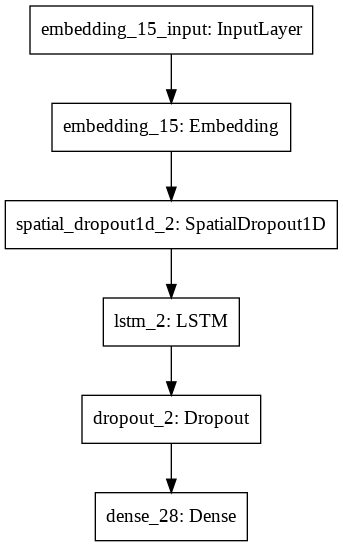

In [114]:

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [116]:
history = model.fit(padded_sequence,y[0],validation_split=0.2, epochs=5, batch_size=32)


Epoch 1/5
250/250 [==============================] - 60s 238ms/step - loss: 0.5078 - accuracy: 0.7643 - val_loss: 0.3756 - val_accuracy: 0.8445
Epoch 2/5
250/250 [==============================] - 59s 236ms/step - loss: 0.3389 - accuracy: 0.8552 - val_loss: 0.3502 - val_accuracy: 0.8525
Epoch 3/5
250/250 [==============================] - 59s 236ms/step - loss: 0.2825 - accuracy: 0.8847 - val_loss: 0.3610 - val_accuracy: 0.8495
Epoch 4/5
250/250 [==============================] - 59s 236ms/step - loss: 0.2472 - accuracy: 0.9021 - val_loss: 0.3901 - val_accuracy: 0.8405
Epoch 5/5
250/250 [==============================] - 59s 234ms/step - loss: 0.2395 - accuracy: 0.9016 - val_loss: 0.4128 - val_accuracy: 0.8395


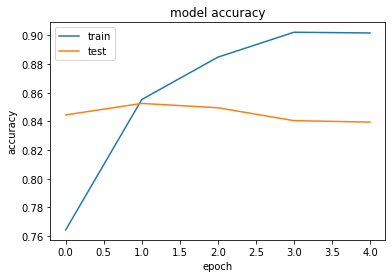

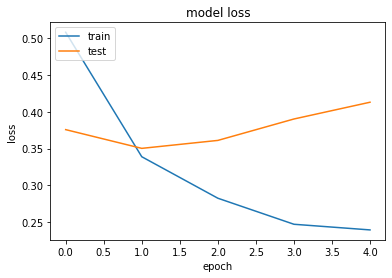

In [118]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [119]:
from numpy import array
from numpy import asarray
from numpy import zeros

**CNN Model**

In [121]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding

model_cnn = Sequential()

e = Embedding(100000, 100, input_length=1000)
model_cnn.add(e)
model_cnn.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(256, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.fit(padded_sequence,y[0],validation_split=0.2, epochs=5, batch_size=32)


Epoch 1/5
250/250 [==============================] - 32s 130ms/step - loss: 0.4652 - accuracy: 0.7812 - val_loss: 0.3637 - val_accuracy: 0.8445
Epoch 2/5
250/250 [==============================] - 32s 129ms/step - loss: 0.2690 - accuracy: 0.8896 - val_loss: 0.3657 - val_accuracy: 0.8480
Epoch 3/5
250/250 [==============================] - 32s 129ms/step - loss: 0.1319 - accuracy: 0.9562 - val_loss: 0.4675 - val_accuracy: 0.8400
Epoch 4/5
250/250 [==============================] - 32s 129ms/step - loss: 0.0504 - accuracy: 0.9846 - val_loss: 0.5543 - val_accuracy: 0.8240
Epoch 5/5
250/250 [==============================] - 32s 130ms/step - loss: 0.0234 - accuracy: 0.9931 - val_loss: 0.6686 - val_accuracy: 0.8240


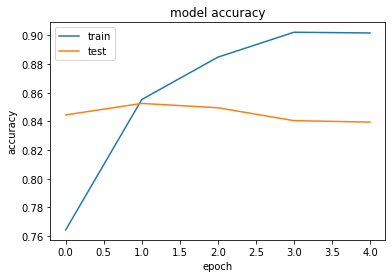

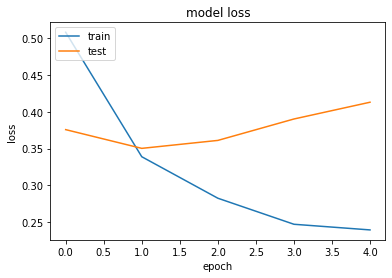

In [122]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()